# Some fun with numpy indexing
## Creating the flag of Scotland

This is one of the many ways to create from scratch the flag of scotland using numpy commands.

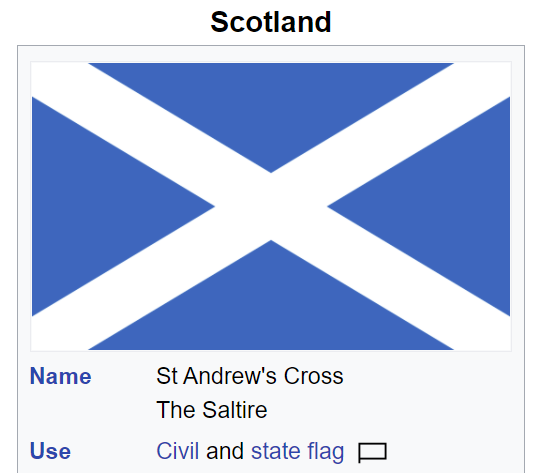

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we want to create 2D arrays with the same size of our flag, that contain the x and y coordinates of every pixel.

(200, 300) (200, 300)


Text(0.5, 1.0, 'y')

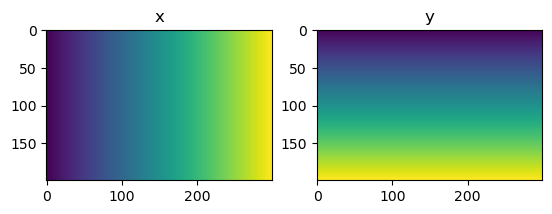

In [2]:
w, h = 300, 200

# from 0 at the top to 1 at the bottom
y = np.tile(np.linspace(0,1,h)[:,np.newaxis], (1,w))

# from 0 at the left to 1 at the right
x = np.tile(np.linspace(0,1,w)[np.newaxis,:], (h,1))

# both arrays have the same shape
print(x.shape, y.shape)

# Let's draw them
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(x)
axs[0].set_title("x")
axs[1].imshow(y)
axs[1].set_title("y")

To create a binary mask of the flag shape that we want to draw, we note that where the absolute value of x-y is close to 0, we are close to the diagonal.
And where the absolute value of x+y-1 is close to 0, we are close to the opposite diagonal.  Alternatively, we can build the opposite diagonal by flipping up/down the first one.

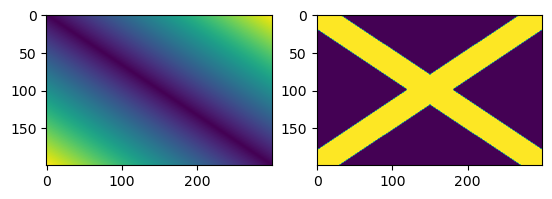

In [3]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(np.abs(x-y))
mask = (np.abs(x-y)<0.1) | (np.abs(x+y-1)<0.1)
axs[1].imshow(mask)

We now create the actual flag.  First, a RGB image with the background color (blue)

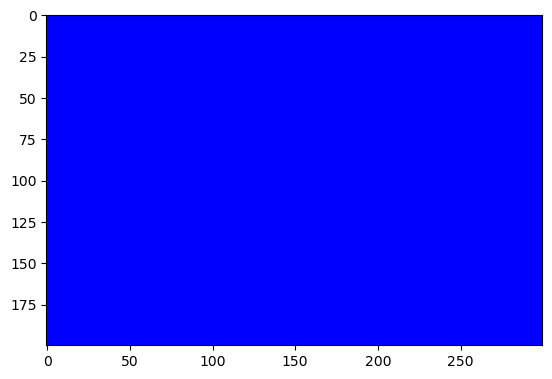

In [4]:
flag = np.tile(np.array([0.0,0.0,1.0])[np.newaxis,np.newaxis,:], (h,w,1))
plt.imshow(flag)

Then, for every pixel that is TRUE in our binary mask, we set all three channels to 1.0 (which yields white).  Note that this makes use of [boolean indexing](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing).

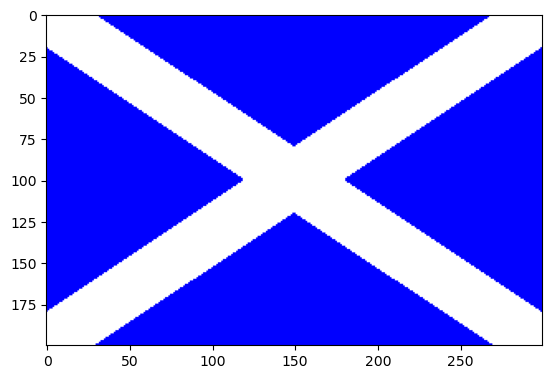

In [5]:
flag[mask, 0] = 1.0
flag[mask, 1] = 1.0
flag[mask, 2] = 1.0
plt.imshow(flag)

## A similar trick for the flag of japan
We now use a similar approach to build a mask from which we could create the flag of japan.

`x` and `y` now contain the number of the column (and row, respectively) for each pixel.  Then, all pixel closer than `r` to the center of the image should be TRUE in our mask.

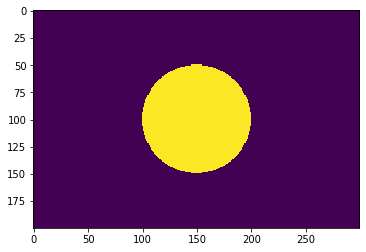

In [6]:
x = np.tile(np.linspace(0,w,w), (h,1))
y = np.tile(np.reshape(np.linspace(0,h,h), (-1,1)), (1,w))
r = 50
plt.imshow((x-w/2)**2+(y-h/2)**2 < r**2)